In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/sample_data/opinion_dataset.csv')
data.head(n=20)

,Opinions,Sentiment
0,Personal sms,Positive
1,Banners at high density population locations l...,Positive
2,Opportunity to receive bonuses,Positive
3,Street advertising boards,Positive
4,Black happines,Negative
5,Monthly promotional schemes for specific products,Positive
6,Pamplets delivered to each apartments nearby.,Positive
7,Entrance of the shopping malls seem to display...,Positive
8,A small stall in the vicinity of the store adv...,Positive
9,Colourful pamphlets,Positive


In [ ]:
data['Sentiment'].value_counts()

Positive    87
Negative    13
Name: Sentiment, dtype: int64

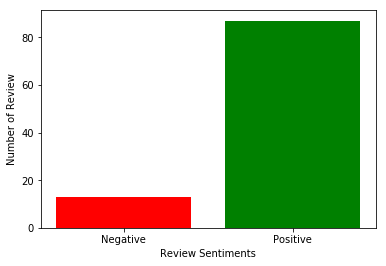

array(['Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positi

In [ ]:
# Target variable visualisation
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Opinions'], color=('r','g'))
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

X = data['Opinions'].values
X
y = data['Sentiment'].values
y

In [ ]:
# Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
# tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Opinions']) # on the IV

In [ ]:
# Data split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size = 0.3, random_state = 1)

In [ ]:
# MultinomialNB fomr Sklearn
from sklearn.naive_bayes import MultinomialNB # Default will be SMOOTHED model ==> alpha = 1 (Laplace or add 1 smoothing)
from sklearn import metrics
MNB_classifier = MultinomialNB().fit(X_train, y_train) # MODEL BUILDING
predicted_MNB = MNB_classifier.predict(X_test) # Prediction
print("Accuracy of MNB Classifier:", metrics.accuracy_score(y_test, predicted_MNB))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_MNB))

Accuracy of MNB Classifier: 0.9
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.93      0.96      0.95        28

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30



In [ ]:
# Logistic Regression form Sklearn
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression().fit(X_train, y_train)
predicted_LR= LR_classifier.predict(X_test)
print("Accuracy of LR Classifier:", metrics.accuracy_score(y_test, predicted_LR))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_LR))

Accuracy of LR Classifier: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



C:\Users\raheem\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# SGD Classifier form Sklearn
from sklearn.linear_model import SGDClassifier
SGD_classifier = SGDClassifier().fit(X_train, y_train)
predicted_SGD= SGD_classifier.predict(X_test)
print("Accuracy of SGD Classifier:", metrics.accuracy_score(y_test, predicted_SGD))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_SGD))

Accuracy of SGD Classifier: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

    Negative       0.17      1.00      0.29         2
    Positive       1.00      0.64      0.78        28

    accuracy                           0.67        30
   macro avg       0.58      0.82      0.53        30
weighted avg       0.94      0.67      0.75        30



In [ ]:
# SVC Classifier from Sklearn
from sklearn.svm import SVC
SVC_classifier = SVC().fit(X_train, y_train)
predicted_SVC= SVC_classifier.predict(X_test)
print("Accuracy of SVC Classifier:", metrics.accuracy_score(y_test, predicted_SVC))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_SVC))

Accuracy of SVC Classifier: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



In [ ]:
# LinearSVC Classifier from Sklearn
from sklearn.svm import LinearSVC
LSVC_classifier = LinearSVC().fit(X_train, y_train)
predicted_LSVC= LSVC_classifier.predict(X_test)
print("Accuracy of LinearSVC Classifier:", metrics.accuracy_score(y_test, predicted_LSVC))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_LSVC))

Accuracy of LinearSVC Classifier: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.93      1.00      0.97        28

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30



In [ ]:
# Decsion Tree Classifier from Sklearn
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier().fit(X_train, y_train)
predicted_DT= DT_classifier.predict(X_test)
print("Accuracy of DT Classifier:", metrics.accuracy_score(y_test, predicted_DT))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_DT))

Accuracy of DT Classifier: 0.5666666666666667
Classification Report:
               precision    recall  f1-score   support

    Negative       0.13      1.00      0.24         2
    Positive       1.00      0.54      0.70        28

    accuracy                           0.57        30
   macro avg       0.57      0.77      0.47        30
weighted avg       0.94      0.57      0.67        30



In [ ]:
# Random Forest Classifier from Sklearn
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier().fit(X_train, y_train)
predicted_RF = RF_classifier.predict(X_test)
print("Accuracy of RF Classifier:", metrics.accuracy_score(y_test, predicted_RF))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_RF))

Accuracy of RF Classifier: 0.5666666666666667
Classification Report:
               precision    recall  f1-score   support

    Negative       0.13      1.00      0.24         2
    Positive       1.00      0.54      0.70        28

    accuracy                           0.57        30
   macro avg       0.57      0.77      0.47        30
weighted avg       0.94      0.57      0.67        30



In [ ]:
# AdaBoost Classifier from Sklearn
from sklearn.ensemble import AdaBoostClassifier
ADB_classifier = AdaBoostClassifier().fit(X_train, y_train)
predicted_ADB = ADB_classifier.predict(X_test)
print("Accuracy of ADB Classifier:", metrics.accuracy_score(y_test, predicted_ADB))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_ADB))

Accuracy of ADB Classifier: 0.6
Classification Report:
               precision    recall  f1-score   support

    Negative       0.14      1.00      0.25         2
    Positive       1.00      0.57      0.73        28

    accuracy                           0.60        30
   macro avg       0.57      0.79      0.49        30
weighted avg       0.94      0.60      0.70        30



In [ ]:
# KNN Classifier from Sklearn
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier().fit(X_train, y_train)
predicted_KNN = KNN_classifier.predict(X_test)
print("Accuracy of KNN Classifier:", metrics.accuracy_score(y_test, predicted_KNN))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_KNN))

Accuracy of KNN Classifier: 0.2
Classification Report:
               precision    recall  f1-score   support

    Negative       0.08      1.00      0.14         2
    Positive       1.00      0.14      0.25        28

    accuracy                           0.20        30
   macro avg       0.54      0.57      0.20        30
weighted avg       0.94      0.20      0.24        30



In [ ]:
# Multi Layer Perceptron Classifier from Sklearn
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter=1000).fit(X_train, y_train)
predicted_MLP = MLP_classifier.predict(X_test)
print("Accuracy of MLP Classifier:", metrics.accuracy_score(y_test, predicted_MLP))
print("Classification Report:\n", metrics.classification_report(y_test, predicted_MLP))

Accuracy of MLP Classifier: 0.7
Classification Report:
               precision    recall  f1-score   support

    Negative       0.18      1.00      0.31         2
    Positive       1.00      0.68      0.81        28

    accuracy                           0.70        30
   macro avg       0.59      0.84      0.56        30
weighted avg       0.95      0.70      0.78        30



In [ ]:
# Confusion Matrix for MLP
from sklearn.metrics import confusion_matrix
CM_MLP = confusion_matrix(y_test, predicted_MLP)
CM_MLP

array([[ 2,  0],
       [ 9, 19]], dtype=int64)

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~ Model Comparison ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print("~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\nAccuracy of MNB Classifier:", metrics.accuracy_score(y_test, predicted_MNB))
print("\nAccuracy of LR Classifier:", metrics.accuracy_score(y_test, predicted_LR))
print("\nAccuracy of SGD Classifier:", metrics.accuracy_score(y_test, predicted_SGD))
print("\nAccuracy of SVC Classifier:", metrics.accuracy_score(y_test, predicted_SVC))
print("\nAccuracy of LinearSVC Classifier:", metrics.accuracy_score(y_test, predicted_LSVC))
print("\nAccuracy of DT Classifier:", metrics.accuracy_score(y_test, predicted_DT))
print("\nAccuracy of RF Classifier:", metrics.accuracy_score(y_test, predicted_RF))
print("\nAccuracy of ADB Classifier:", metrics.accuracy_score(y_test, predicted_ADB))
print("\nAccuracy of KNN Classifier:", metrics.accuracy_score(y_test, predicted_KNN))
print("\nAccuracy of MLP Classifier:", metrics.accuracy_score(y_test, predicted_MLP))

~~~~~~~~~~~~~~ Accuracies of the Classifiers ~~~~~~~~~~~~~~~~~~~~~~~~~

Accuracy of MNB Classifier: 0.9

Accuracy of LR Classifier: 0.9333333333333333

Accuracy of SGD Classifier: 0.6666666666666666

Accuracy of SVC Classifier: 0.9333333333333333

Accuracy of LinearSVC Classifier: 0.9333333333333333

Accuracy of DT Classifier: 0.5666666666666667

Accuracy of RF Classifier: 0.5666666666666667

Accuracy of ADB Classifier: 0.6

Accuracy of KNN Classifier: 0.2

Accuracy of MLP Classifier: 0.7


In [ ]:
# Save and Load the classifier
import pickle
print(" \n~~~~~~~~~ Save and Load the classifier  ~~~~~~~~~ ")
saved_model = pickle.dumps(SVC_classifier) 
SVC_from_pickle = pickle.loads(saved_model) 
SVC_from_pickle.predict(X_test) 

 
~~~~~~~~~ Save and Load the classifier  ~~~~~~~~~ 


array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive'],
      dtype=object)